In [47]:
#import pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import datetime for datetime manipulation 
from datetime import datetime as dt

from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Problem Definition

How to prevent the occurence of fraud on its platform is usually a major source of concern for every online payment processing company as it would assist them to acquire and retain customers on their platform and in so doing boost its profits year in,year out. With the help of machine learning techniques they are able to monitor and prevent this ugly trend which has been the bane of many payment processing companies on the internet.

In this Capstone project we will seek to differentiate fraudulent payment transactions from valid transactions with the assistance of machine learning techiques. This would be achieved with the use of information from the dataset provided to us.

In [15]:
# loading the dataset to a Pandas DataFrame
online_payment = pd.read_csv('Online Payment Fraud Detection.csv')

#Data_Preprocessing

In [16]:
# first 5 rows of the dataset
online_payment.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
online_payment.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [6]:
# dataset informations
online_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
#use describe() to see summary statistics of numeric columns
online_payment.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [8]:
# checking the number of missing values in each column
online_payment.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

# Exploratory Data Analysis in Python

<AxesSubplot:>

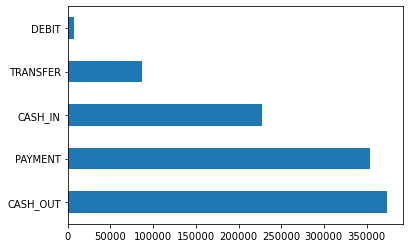

In [17]:
#Visaulize type column
online_payment['type'].value_counts().plot.barh()

In [10]:
# distribution of legit transactions & fraudulent transactions
# 0= legit transactions
# 1= fraudulent transactions
online_payment['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

<AxesSubplot:>

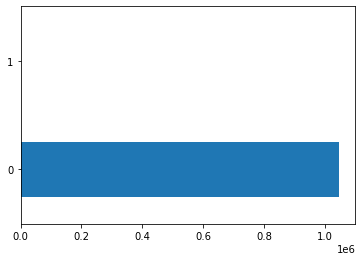

In [11]:
#Visaulize isfraud column
online_payment['isFraud'].value_counts().plot.barh()

This Dataset is highly unbalanced

0 --> Legit Transaction

1 --> fraudulent transaction

In [18]:
# split data for analysis
legit = online_payment[online_payment.isFraud == 0]
fraud = online_payment[online_payment.isFraud == 1]

In [19]:
print(legit.shape)
print(fraud.shape)

(1047433, 10)
(1142, 10)


In [20]:
# Checking the % distribution of legit vs fraud
isFraud=online_payment['isFraud'].value_counts()
legit_split=isFraud[0]/online_payment['isFraud'].count()*100
fraud_split=isFraud[1]/online_payment['isFraud'].count()*100

print(legit_split)
print(fraud_split)

99.89109028920201
0.10890971079798775


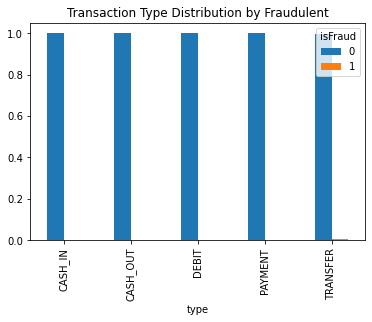

In [21]:
#create pivot of transaction type and fraudulent transaction
online_payment_pivot = pd.crosstab(online_payment.type,online_payment.isFraud,normalize='index')

#plot the data
online_payment_pivot.plot.bar(stacked=False)

plt.title('Transaction Type Distribution by Fraudulent')
plt.show()
#tranfers have more of fraudulent transactions

In [ ]:
£

In [32]:
# Checking the correlation
corr = online_payment.corr()
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


<AxesSubplot:>

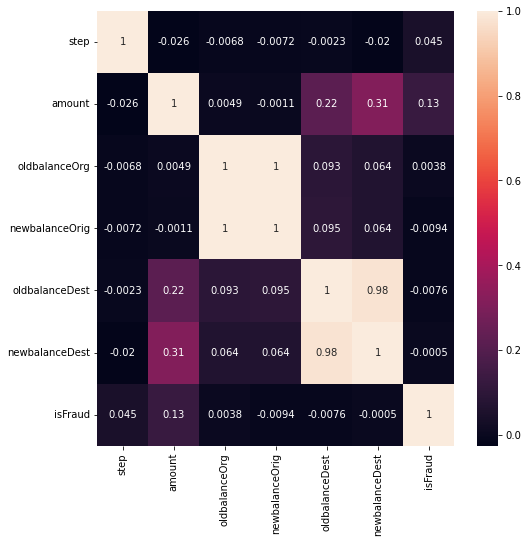

In [30]:
# Checking the correlation in heatmap
plt.figure(figsize=(8,8))
sns.heatmap(online_payment.corr(),annot=True)

# Feature Engineering

In [58]:
#Checking for the labels in the categorical parameters 
print(online_payment['type'].unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [57]:
#Checking for the label counts in the categorical parameters 
online_payment['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [61]:
#One-Hot encoding the categorical parameters using pd.get_dummies() 
one_hot_encoded_data = pd.get_dummies(online_payment, columns = ['type'])
one_hot_encoded_data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [68]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   amount          1048575 non-null  float64
 2   nameOrig        1048575 non-null  object 
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  float64
 5   nameDest        1048575 non-null  object 
 6   oldbalanceDest  1048575 non-null  float64
 7   newbalanceDest  1048575 non-null  float64
 8   isFraud         1048575 non-null  int64  
 9   type_CASH_IN    1048575 non-null  uint8  
 10  type_CASH_OUT   1048575 non-null  uint8  
 11  type_DEBIT      1048575 non-null  uint8  
 12  type_PAYMENT    1048575 non-null  uint8  
 13  type_TRANSFER   1048575 non-null  uint8  
dtypes: float64(5), int64(2), object(2), uint8(5)
memory usage: 77.0+ MB


In [69]:
# distribution of legit transactions & fraudulent transactions
# 0= legit transactions
# 1= fraudulent transactions
one_hot_encoded_data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [70]:
# split data for analysis
legit = one_hot_encoded_data[one_hot_encoded_data.isFraud == 0]
fraud = one_hot_encoded_data[one_hot_encoded_data.isFraud == 1]

In [71]:
print(legit.shape)
print(fraud.shape)

(1047433, 14)
(1142, 14)


In [72]:
# Checking the % distribution of legit vs fraud
isFraud=one_hot_encoded_data['isFraud'].value_counts()
legit_split=isFraud[0]/one_hot_encoded_data['isFraud'].count()*100
fraud_split=isFraud[1]/one_hot_encoded_data['isFraud'].count()*100

print(legit_split)
print(fraud_split)

99.89109028920201
0.10890971079798775


In [73]:
# statistical measures of the data
legit.amount.describe().astype(int)

count    1047433
mean      157539
std       254188
min            0
25%        12134
50%        76214
75%       213492
max      6419835
Name: amount, dtype: int32

In [74]:
fraud.amount.describe().astype(int)

count        1142
mean      1192628
std       2030598
min           119
25%         86070
50%        353179
75%       1248759
max      10000000
Name: amount, dtype: int32

In [75]:
# compare the values for both transactions
one_hot_encoded_data.groupby('isFraud').mean().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
isFraud,,,,,,,,,,,
0,26,157539,873633,894746,978732,1114237,0,0,0,0,0
1,48,1192628,1218636,33944,452866,1077940,0,0,0,0,0


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 1142

In [76]:
legitrns_sample = legit.sample(n=1142)

In [77]:
#Concatenating two DataFrames
new_data = pd.concat([legitrns_sample, fraud], axis=0)

In [78]:
new_data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
784448,39,68528.06,C1308884758,2031.0,70559.06,C169613086,0.00,0.00,0,1,0,0,0,0
827606,41,4423.00,C1807443129,297758.0,293335.00,M2044489563,0.00,0.00,0,0,0,0,1,0
914818,43,7237.42,C1883021748,0.0,0.00,M908152527,0.00,0.00,0,0,0,0,1,0
582384,33,149795.76,C1159375130,0.0,0.00,C1137307951,194716.57,344512.33,0,0,1,0,0,0
606575,34,466987.80,C1458643647,11264.0,0.00,C1605447575,0.00,722379.93,0,0,1,0,0,0


In [79]:
new_data.tail()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1047888,95,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1,0,1,0,0,0
1048221,95,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1,0,0,0,0,1
1048222,95,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1,0,1,0,0,0
1048323,95,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1,0,0,0,0,1
1048324,95,87999.25,C409531429,87999.25,0.0,C1827219533,0.00,87999.25,1,0,1,0,0,0


In [80]:
new_data.count()

step              2284
amount            2284
nameOrig          2284
oldbalanceOrg     2284
newbalanceOrig    2284
nameDest          2284
oldbalanceDest    2284
newbalanceDest    2284
isFraud           2284
type_CASH_IN      2284
type_CASH_OUT     2284
type_DEBIT        2284
type_PAYMENT      2284
type_TRANSFER     2284
dtype: int64

In [81]:
new_data['isFraud'].value_counts()

0    1142
1    1142
Name: isFraud, dtype: int64

In [82]:
new_data.groupby('isFraud').mean().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
isFraud,,,,,,,,,,,
0,26,157949,856078,882125,1022387,1160952,0,0,0,0,0
1,48,1192628,1218636,33944,452866,1077940,0,0,0,0,0


Splitting the data into Features & Targets

In [96]:
X = new_data.drop(columns=['isFraud','nameOrig','nameDest'],axis=1)
y = new_data['isFraud']

In [97]:
print(X)

         step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
784448     39   68528.06        2031.00        70559.06            0.00   
827606     41    4423.00      297758.00       293335.00            0.00   
914818     43    7237.42           0.00            0.00            0.00   
582384     33  149795.76           0.00            0.00       194716.57   
606575     34  466987.80       11264.00            0.00            0.00   
...       ...        ...            ...             ...             ...   
1047888    95   56745.14       56745.14            0.00        51433.88   
1048221    95   33676.59       33676.59            0.00            0.00   
1048222    95   33676.59       33676.59            0.00            0.00   
1048323    95   87999.25       87999.25            0.00            0.00   
1048324    95   87999.25       87999.25            0.00            0.00   

         newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
784448             0.00        

In [98]:
print(y)

784448     0
827606     0
914818     0
582384     0
606575     0
          ..
1047888    1
1048221    1
1048222    1
1048323    1
1048324    1
Name: isFraud, Length: 2284, dtype: int64


Split the data into Training data & Testing Data

In [99]:
#split into training and validation sets using a 40% split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=Y, random_state=2)

In [100]:
# Supervised learning model1
LR = LogisticRegression()

In [101]:
#Supervised Learning Model 2
DC = DecisionTreeClassifier()

In [102]:
#Supervised Learning Model 3
RF = RandomForestClassifier()

In [103]:
#create list of model names
models = [LR,DC,RF]

In [106]:
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction,y_test)) #use this later

In [107]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For LogisticRegression, Accuracy score is 0.9299781181619255 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       437
           1       0.95      0.91      0.93       477

    accuracy                           0.93       914
   macro avg       0.93      0.93      0.93       914
weighted avg       0.93      0.93      0.93       914


For DecisionTreeClassifier, Accuracy score is 0.9649890590809628 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       447
           1       0.98      0.96      0.97       467

    accuracy                           0.96       914
   macro avg       0.96      0.97      0.96       914
weighted avg       0.97      0.96      0.96       914


For RandomForestClassifier, Accuracy score is 0.9770240700218819 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       458
           1       0.98      0.98    